# KERAS DEEP LEARNING

Set random seeds and import modules

In [25]:
from numpy.random import seed
seed(1337)
from tensorflow import set_random_seed
set_random_seed(1337)

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD

#### Load dataset, split into train and test data

In [29]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, x_test.shape,y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

#### Start building the model graph, add input and output layers

In [35]:
basic_model = Sequential()

basic_model.add(Dense(units=13, input_dim = 13, kernel_initializer = 'normal'))

basic_model.add(Dense(units = 1, kernel_initializer = 'normal', activation='linear'))

basic_model.compile(optimizer=SGD(lr = 0.000001), loss='mean_absolute_error', 
                    metrics=['accuracy', "mse"])

basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


#### Build a better model

In [36]:
advanced_model = Sequential()

advanced_model.add(Dense(units=32, input_dim = 13, kernel_initializer = 'truncated_normal'))

advanced_model.add(Dense(units = 16, kernel_initializer = 'truncated_normal'))

advanced_model.add(Dense(units = 1, kernel_initializer = 'truncated_normal'))

advanced_model.compile(optimizer="adam", loss='mean_absolute_error', metrics=['accuracy'])

advanced_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


#### Check training data

In [47]:
print("Features of the first house in the dataset:\n", x_train[0])
print("\nFirst house in the dataset's price in thousands:",y_train[0])

Features of the first house in the dataset:
 [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

First house in the dataset's price in thousands: 15.2


#### Train the model

In [53]:
basic_model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=0, validation_split=0.1)

In [54]:
advanced_model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=0, validation_split=0.1)

#### Model Evaluation Function

In [55]:
def test_model(model, metric="accuracy"):
    evaluation = model.evaluate(x_test, y_test, verbose=0)
    
    print("-------------------------------------")
    print("Loss over the test dataset: %.2f" % (evaluation[0]))
    print("-------------------------------------")
    if metric == "accuracy":
        print("Accuarcy: %.2f" % (evaluation[1]))
    elif metric == "mae":
        print("Mean absolute error: %.2f" % (evaluation[1]))

#### Test the Basic Model

In [56]:
test_model(basic_model)

-------------------------------------
Loss over the test dataset: 11.96
-------------------------------------
Accuarcy: 0.00


In [57]:
test_model(advanced_model)

-------------------------------------
Loss over the test dataset: 3.76
-------------------------------------
Accuarcy: 0.01


#### Define Function to check Actual House Predictions

In [58]:
def check_predictions(model):
    train_houses=[x_train[0:1], x_train[10:11], x_train[200:201]]
    train_actual_prices = [y_train[0:1], y_train[10], y_train[200]]
    
    print("\n")
    print("Training set points:")
    
    for house, price in zip(train_houses, train_actual_prices):
        prediction = model.predict(house)
        print(f"Predicted price: {prediction}, Actual price: {price}")
    
    test_houses=[x_test[1:2], x_test[50:51], x_test[100:101]]
    test_actual_prices = [y_test[1], y_test[50], y_test[100]]
    
    print("\n")
    print("Testing set points:")
    
    for house, price in zip(test_houses, test_actual_prices):
        prediction = model.predict(house)
        print(f"Predicted price: {prediction}, Actual price: {price}")

In [62]:
print("Sliced: ", x_train[0:1])
print("\nNot sliced: ", x_train[0])

Sliced:  [[  1.23247   0.        8.14      0.        0.538     6.142    91.7
    3.9769    4.      307.       21.      396.9      18.72   ]]

Not sliced:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


#### Check concrete predictions for our advanced model

In [63]:
check_predictions(advanced_model)



Training set points:
Predicted price: [[17.8086]], Actual price: [15.2]
Predicted price: [[17.133348]], Actual price: 12.1
Predicted price: [[26.92762]], Actual price: 23.9


Testing set points:
Predicted price: [[18.227278]], Actual price: 18.8
Predicted price: [[32.509747]], Actual price: 35.4
Predicted price: [[31.834547]], Actual price: 26.7


#### Imrove Model

In [65]:
improved_model = Sequential()

improved_model.add(Dense(units=64, input_dim = 13, kernel_initializer = 'truncated_normal', activation="relu"))

improved_model.add(Dense(units = 32, kernel_initializer = 'truncated_normal', activation="relu"))

improved_model.add(Dense(units = 1, kernel_initializer = 'truncated_normal'))

improved_model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mae'])
improved_model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=0, validation_split=0.2)

test_model(improved_model)

check_predictions(improved_model)

-------------------------------------
Loss over the test dataset: 30.16
-------------------------------------
Accuarcy: 3.82


Training set points:
Predicted price: [[17.580786]], Actual price: [15.2]
Predicted price: [[14.068082]], Actual price: 12.1
Predicted price: [[25.193892]], Actual price: 23.9


Testing set points:
Predicted price: [[18.64862]], Actual price: 18.8
Predicted price: [[35.578312]], Actual price: 35.4
Predicted price: [[27.62483]], Actual price: 26.7


In [66]:
test_model(improved_model, metric = "mae")

-------------------------------------
Loss over the test dataset: 30.16
-------------------------------------
Mean absolute error: 3.82


## 2. Convolution Neural Network

In [1]:
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


#### Add Convolutional and Max Pooling layers

In [2]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid'))

#### Import the dataset, load train and test data¶

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

#### Look at the Shape of our Data

In [4]:
print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


#### Show some Images from the CIFAR 10 Dataset

C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


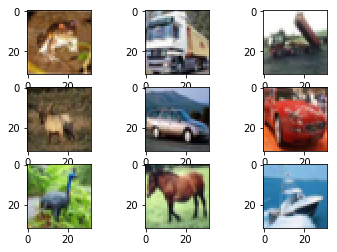

In [5]:
from matplotlib import pyplot
%matplotlib inline
from scipy.misc import toimage

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(train_features[i]))
pyplot.show()

#### Rescale Images

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

In [7]:
test_features.shape

(10000, 32, 32, 3)

#### Labels before One-hot Encoding

In [8]:
test_labels[0], test_labels[1]

(array([3]), array([8]))

#### One-hot Encoding

In [9]:
from keras.utils import np_utils

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

test_labels[0], test_labels.shape

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), (10000, 10))

#### Build a basic CNN Model

In [21]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(train_features.shape[1:])))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(4, 4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_features, train_labels, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 691us/step - loss: 1.6512 - acc: 0.4000 - val_loss: 1.3609 - val_acc: 0.5160
Epoch 2/10
40000/40000 [==============================] - 27s 675us/step - loss: 1.2834 - acc: 0.5423 - val_loss: 1.2736 - val_acc: 0.5559
Epoch 3/10
40000/40000 [==============================] - 27s 686us/step - loss: 1.1385 - acc: 0.5999 - val_loss: 1.1263 - val_acc: 0.5994
Epoch 4/10
40000/40000 [==============================] - 30s 750us/step - loss: 1.0305 - acc: 0.6391 - val_loss: 1.0480 - val_acc: 0.6344
Epoch 5/10
40000/40000 [==============================] - 30s 746us/step - loss: 0.9441 - acc: 0.6703 - val_loss: 0.9965 - val_acc: 0.6506
Epoch 6/10
40000/40000 [==============================] - 31s 764us/step - loss: 0.8735 - acc: 0.6943 - val_loss: 0.9537 - val_acc: 0.6687
Epoch 7/10
40000/40000 [==============================] - 30s 760us/step - loss: 0.8145 - acc: 0.7157 - val_loss: 0.

#### Add Leaky Relu Activation Function to a layer

In [11]:
from keras.layers.advanced_activations import LeakyReLU

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="valid", input_shape=(train_features.shape[1:])))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

#### Add dropout to a layer

In [12]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="valid", input_shape=(train_features.shape[1:])))
model.add(Dropout(0.4))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

#### Advanced model implementation¶

In [13]:
dropout = 0.3
alpha = 0.02
advanced_model = Sequential()

advanced_model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same", input_shape=(train_features.shape[1:])))

advanced_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
advanced_model.add(Dropout(dropout))



advanced_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
advanced_model.add(LeakyReLU(alpha=alpha))
advanced_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
advanced_model.add(Dropout(dropout))



advanced_model.add(Conv2D(filters=64, kernel_size=(4, 4), padding="same"))
advanced_model.add(LeakyReLU(alpha=alpha))
advanced_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
advanced_model.add(Dropout(dropout))



advanced_model.add(Flatten())

advanced_model.add(Dense(1024))
advanced_model.add(Dropout(dropout))
advanced_model.add(LeakyReLU(alpha=alpha))

advanced_model.add(Dense(512))
advanced_model.add(Dropout(dropout))
advanced_model.add(LeakyReLU(alpha=alpha))

advanced_model.add(Dense(10, activation="softmax"))


advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Training the model

In [14]:
advanced_model.fit(train_features, train_labels, validation_split=0.2, epochs=50, batch_size=128, verbose=0)

#### Saving the model

In [15]:
advanced_model.save("model.hdf5")

#### Loading the model

In [16]:
from keras.models import load_model
loaded_model = load_model('model.hdf5')

#### Define test function

In [17]:
def test_model(model):
    evaluation = model.evaluate(test_features, test_labels, verbose=0)
    
    print("-------------------------------------")
    print("Loss over the test dataset: %.2f" % (evaluation[0]))
    print("-------------------------------------")
    print("Accuracy: %.2f" % (evaluation[1]))

#### Test our Basic, Advanced model

In [22]:
test_model(model)

-------------------------------------
Loss over the test dataset: 0.91
-------------------------------------
Accuracy: 0.69


In [20]:
test_model(advanced_model)

-------------------------------------
Loss over the test dataset: 0.82
-------------------------------------
Accuracy: 0.74


## 3. AutoEncoders

In [1]:
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load dataset and reshape it to one dimension
We dont need the train and test labels

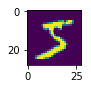

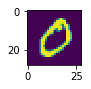

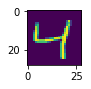

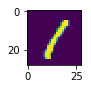

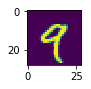

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

# display some images from the dataset
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(x_train[i])
    plt.show()
    
#reshape into one dimension, model with dense layers
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#### Build a simple Autoencoder model, using the Keras Functional API
Previously we used sequential API

In [3]:
input_layer = Input(shape=(784,))

encoding_layer = Dense(32, activation='relu')(input_layer)
decoding_layer = Dense(784, activation='sigmoid')(encoding_layer)

autoencoder = Model(input_layer, decoding_layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#### Build an improved Autoencoder model, using the Keras Functional API

In [4]:
input_layer = Input(shape=(784,))

encoding_layer1 = Dense(128, activation='relu')(input_layer)
encoding_layer2 = Dense(64, activation='relu')(encoding_layer1)

encoding_layer3 = Dense(32, activation='relu')(encoding_layer2)

decoding_layer1 = Dense(64, activation='relu')(encoding_layer2)
decoding_layer2 = Dense(128, activation='relu')(decoding_layer1)

output_decoding_layer = Dense(784, activation='sigmoid')(decoding_layer2)

autoencoder = Model(input_layer, output_decoding_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#### Build a deep convolutional Autoencoder model, using the Keras Functional API

In [5]:
input_layer = Input(shape=(28, 28, 1))

#encoder
encoding_layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
max_pool_1 = MaxPooling2D((2, 2), padding='same')(encoding_layer1)
encoding_layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(max_pool_1)
max_pool_2 = MaxPooling2D((2, 2), padding='same')(encoding_layer2)

#decoder
decoding_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(max_pool_2)
upsampling_layer1 = UpSampling2D((2, 2))(decoding_layer1)
decoding_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(upsampling_layer1)
upsampling_layer2 = UpSampling2D((2, 2))(decoding_layer2)

output_decoding_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsampling_layer2)

autoencoder = Model(input_layer, output_decoding_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#### Load data, reshape and rescale it

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.     
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#### Add noise to images¶

In [7]:
noise_factor = 0.4
x_train_noise  = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

#### Display images with noise


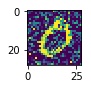

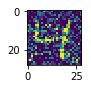

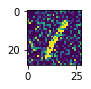

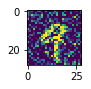

In [8]:
for i in range(1,5):
    plt.figure(figsize=(1,1))
    plt.imshow(x_train_noise[i].reshape(28,28))
    plt.show();

#### Train the model

In [9]:
autoencoder.fit(x_train_noise, x_train, epochs=10, batch_size=128, shuffle=True, validation_split = 0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 134s 3ms/step - loss: 0.1551 - val_loss: 0.1039
Epoch 2/10
51000/51000 [==============================] - 144s 3ms/step - loss: 0.0984 - val_loss: 0.0959
Epoch 3/10
51000/51000 [==============================] - 144s 3ms/step - loss: 0.0940 - val_loss: 0.0936
Epoch 4/10
51000/51000 [==============================] - 139s 3ms/step - loss: 0.0918 - val_loss: 0.0914
Epoch 5/10
51000/51000 [==============================] - 138s 3ms/step - loss: 0.0903 - val_loss: 0.0902
Epoch 6/10
51000/51000 [==============================] - 139s 3ms/step - loss: 0.0892 - val_loss: 0.0892
Epoch 7/10
51000/51000 [==============================] - 148s 3ms/step - loss: 0.0883 - val_loss: 0.0887
Epoch 8/10
51000/51000 [==============================] - 134s 3ms/step - loss: 0.0875 - val_loss: 0.0885
Epoch 9/10
51000/51000 [==============================] - 139s 3ms/step - loss: 0.0870 - val_loss: 0.08

#### Test the convolutional Autoencoder on the test images with noise

In [10]:
output_images = autoencoder.predict(x_test_noise)

#### Display noisy images before passing them through the Autoencoder and output images

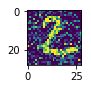

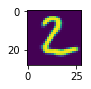

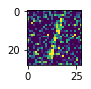

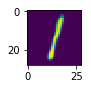

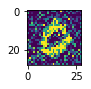

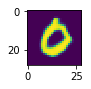

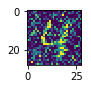

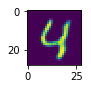

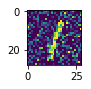

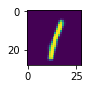

In [13]:
for i in range(1,6):
    plt.figure(figsize=(1,1))
    plt.imshow(x_test_noise[i].reshape(28,28))
    plt.show()
    plt.figure(figsize=(1,1))
    plt.imshow(output_images[i].reshape(28,28))
    plt.show()

## RNN for Machine Translation

In [49]:
import os
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import GRU, Input, Dense, TimeDistributed, Embedding, Bidirectional, RepeatVector
from keras.models import Model, Sequential
from keras.layers import Activation, LSTM
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

#### Load data

In [50]:
def load_file(path):
    input_file = os.path.join(path)
    with open(input_file, "r", encoding = "utf8") as f:
        data = f.read().split('\n')

    return data

In [52]:
english_sentences = load_file('en_data')
french_sentences = load_file('fr_data')

english_sentences=english_sentences[:600]
french_sentences=french_sentences[:600]


print(type(english_sentences))
print(len(english_sentences), len(french_sentences))
print('Dataset Loaded')

<class 'list'>
600 600
Dataset Loaded


In [53]:
print(english_sentences[0])
print(french_sentences[0])

paris is sometimes warm during june , but it is usually hot in july .
paris est parfois chaud en juin , mais il est généralement chaud en juillet .


#### Tokenize

In [54]:
def tokenize(input):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(input)
    input_tokenized = tokenizer.texts_to_sequences(input)
    
    return input_tokenized, tokenizer

french_data_tokenized, french_tokenizer = tokenize(french_sentences)
english_data_tokenized, english_tokenizer = tokenize(english_sentences)

print(english_data_tokenized[1])
print(french_data_tokenized[1])

[15, 1, 8, 32, 4, 66, 7, 3, 1, 9, 53, 2, 31]
[22, 1, 8, 127, 42, 13, 65, 6, 3, 1, 12, 59, 2, 38]


#### Add Padding

In [55]:
def pad(input, length=None):
   
    if length == None:
        length = max([len(seq) for seq in input])
        
    return pad_sequences(input, maxlen=length, padding='post')


french_data_padded = pad(french_data_tokenized)
french_data_padded = french_data_padded.reshape(*french_data_padded.shape, 1)
english_data_padded = pad(english_data_tokenized)

print(english_data_padded[1])
print(french_data_padded[1])

[15  1  8 32  4 66  7  3  1  9 53  2 31  0  0]
[[ 22]
 [  1]
 [  8]
 [127]
 [ 42]
 [ 13]
 [ 65]
 [  6]
 [  3]
 [  1]
 [ 12]
 [ 59]
 [  2]
 [ 38]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


#### Build a simple RNN model

In [56]:
def simple_model(input_shape, output_len, num_uniq_fr_words):

    model = Sequential()
    model.add(GRU(units=256, input_shape=input_shape[1:], return_sequences=True))
    model.add(TimeDistributed(Dense(num_uniq_fr_words)))
    model.add(Activation('softmax'))
    
    learning_rate = 0.002
        
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    return model

#### Advanced RNN model

In [57]:
def advanced_model(input_shape, output_len, num_uniq_en_words, num_uniq_fr_words):
    
    model = Sequential()
    model.add(Embedding(num_uniq_en_words, 512, input_length=input_shape[1]))
    model.add(Bidirectional(LSTM(512, return_sequences=False)))
    model.add(RepeatVector(output_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(TimeDistributed(Dense(num_uniq_fr_words)))
    model.add(Activation('softmax'))
    
    learning_rate=0.002
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

#### Train the model

In [63]:
'''model = advanced_model(english_data_padded.shape, french_data_padded.shape[1], 
                       len(english_tokenizer.word_index), len(french_tokenizer.word_index))

model.fit(english_data_padded, french_data_padded, batch_size=16, epochs=2, validation_split=0.1)'''

'model = advanced_model(english_data_padded.shape, french_data_padded.shape[1], \n                       len(english_tokenizer.word_index), len(french_tokenizer.word_index))\n\nmodel.fit(english_data_padded, french_data_padded, batch_size=16, epochs=2, validation_split=0.1)'

In [ ]:
fr_id_to_word = {value: key for key, value in french_tokenizer.word_index.items()}
fr_id_to_word[0] = '|empty space|'

sentence = 'china is usually hot during february and it is usually wonderful in winter'
sentence = [english_tokenizer.word_index[word] for word in sentence.split()]
sentence = pad_sequences([sentence], maxlen=english_data_padded.shape[-1], padding='post')

sentences = np.array([sentence[0]])
predictions = model.predict(sentence)


print(' '.join([fr_id_to_word[np.argmax(x)] for x in predictions[0]]))

## Generative Adversarial Network

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization

### Batch Normalization

In [65]:
model = Sequential()

model.add(Dense(64, input_dim=14, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

### More imports

In [67]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [98]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [99]:
x_train=x_train[:5000]
y_train= y_train[:5000]
x_test=x_train[:2000]
y_test= y_train[:2000]

### Reshape data

In [100]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_train = (x_train - 127.5) / 127.5

### Generator model

In [101]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, ))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D())
generator.add(Convolution2D(64, kernel_size = 5, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add( UpSampling2D())
generator.add( Convolution2D(1, kernel_size = 5, padding='same', activation='tanh'))

In [102]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
__________

### Discriminator Model

In [103]:
discriminator = Sequential()
discriminator.add(Convolution2D(64, kernel_size = 5,  strides=(2,2), input_shape=(28,28,1), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Convolution2D(128, kernel_size = 5, strides=(2,2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

In [104]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
__________

### Compile Models

In [105]:
generator.compile(loss='binary_crossentropy', optimizer=Adam())
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

### Build GAN model

In [106]:
discriminator.trainable = False

input = Input(shape=(100,))
gen = generator(input)
output = discriminator(gen)
gan = Model(inputs=input, outputs=output)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [107]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_15 (Sequential)   (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_16 (Sequential)   (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


### Train the Model

In [108]:
def train(epoch=10, batch_size=128):
    batch_count = x_train.shape[0] // batch_size
    
    for i in range(epoch):
        for j in range(batch_count):
 
            noise_input = np.random.rand(batch_size, 100)
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
            predictions = generator.predict(noise_input, batch_size=batch_size)
            
            X = np.concatenate([predictions, image_batch])
            y_discriminator = [0]*batch_size + [1]*batch_size
            
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_discriminator)
            
            noise_input = np.random.rand(batch_size, 100)
            y_generator = [1]*batch_size
            
            discriminator.trainable = False
            gan.train_on_batch(noise_input, y_generator)

In [109]:
train(5, 128)

### Test the model

In [110]:
def plot_output():
    try_input = np.random.rand(100, 100)
    preds = generator.predict(try_input)

    plt.figure(figsize=(10,10))
    for i in range(preds.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(preds[i, :, :, 0], cmap='gray')
        plt.axis('off')

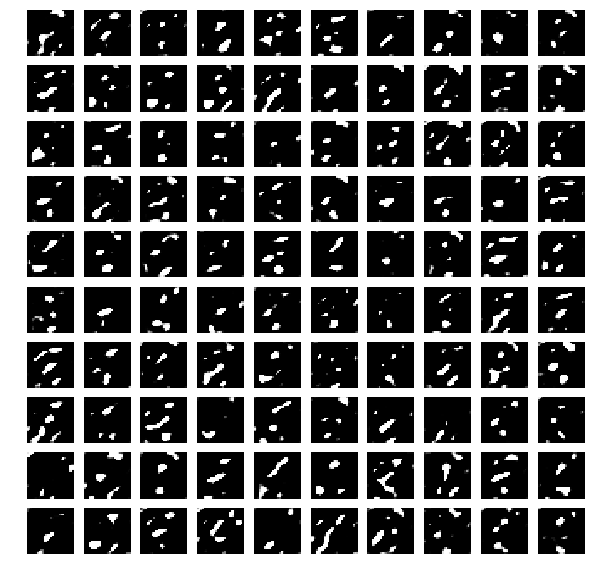

In [111]:
plot_output()